In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from sklearn import metrics

import time
import os
import cv2

img_height = 64
img_width = 64
batch_size = 32

In [2]:
train_ds = keras.utils.image_dataset_from_directory(
    directory='training_data/',
    labels='inferred',
    label_mode='binary',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True
)

Found 5064 files belonging to 2 classes.


In [3]:
val_ds = keras.utils.image_dataset_from_directory(
    directory='validation_data/',
    labels='inferred',
    label_mode='binary',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True
)

Found 967 files belonging to 2 classes.


In [4]:
test_ds = keras.utils.image_dataset_from_directory(
    directory='test_data/',
    labels='inferred',
    label_mode='binary',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True
)

Found 564 files belonging to 2 classes.


In [5]:
all_ds = keras.utils.image_dataset_from_directory(
    directory='tiles/',
    labels='inferred',
    label_mode='binary',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True
)

Found 114216 files belonging to 2 classes.


In [6]:
class_names = train_ds.class_names
print(class_names)

['defect', 'normal']


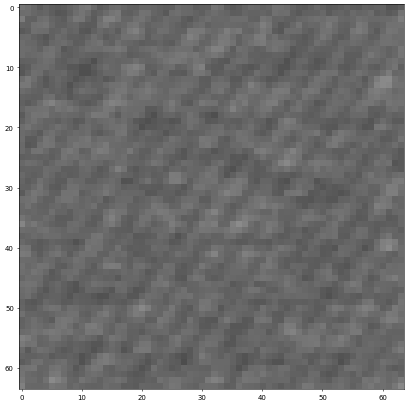

tf.Tensor(
[[[116. 116. 116.]
  [111. 111. 111.]
  [102. 102. 102.]
  ...
  [ 85.  85.  85.]
  [ 86.  86.  86.]
  [ 94.  94.  94.]]

 [[109. 109. 109.]
  [110. 110. 110.]
  [103. 103. 103.]
  ...
  [ 90.  90.  90.]
  [ 95.  95.  95.]
  [115. 115. 115.]]

 [[124. 124. 124.]
  [ 98.  98.  98.]
  [ 97.  97.  97.]
  ...
  [107. 107. 107.]
  [111. 111. 111.]
  [125. 125. 125.]]

 ...

 [[115. 115. 115.]
  [106. 106. 106.]
  [103. 103. 103.]
  ...
  [104. 104. 104.]
  [107. 107. 107.]
  [ 99.  99.  99.]]

 [[120. 120. 120.]
  [107. 107. 107.]
  [107. 107. 107.]
  ...
  [104. 104. 104.]
  [109. 109. 109.]
  [120. 120. 120.]]

 [[128. 128. 128.]
  [104. 104. 104.]
  [103. 103. 103.]
  ...
  [107. 107. 107.]
  [119. 119. 119.]
  [136. 136. 136.]]], shape=(64, 64, 3), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
-----------------------------


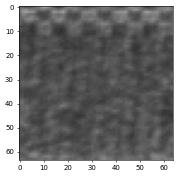

tf.Tensor(
[[[109. 109. 109.]
  [100. 100. 100.]
  [ 93.  93.  93.]
  ...
  [132. 132. 132.]
  [137. 137. 137.]
  [115. 115. 115.]]

 [[109. 109. 109.]
  [138. 138. 138.]
  [142. 142. 142.]
  ...
  [139. 139. 139.]
  [133. 133. 133.]
  [118. 118. 118.]]

 [[120. 120. 120.]
  [142. 142. 142.]
  [158. 158. 158.]
  ...
  [105. 105. 105.]
  [102. 102. 102.]
  [ 91.  91.  91.]]

 ...

 [[ 85.  85.  85.]
  [ 86.  86.  86.]
  [ 93.  93.  93.]
  ...
  [102. 102. 102.]
  [ 98.  98.  98.]
  [ 82.  82.  82.]]

 [[ 98.  98.  98.]
  [ 91.  91.  91.]
  [ 92.  92.  92.]
  ...
  [106. 106. 106.]
  [ 99.  99.  99.]
  [ 91.  91.  91.]]

 [[112. 112. 112.]
  [104. 104. 104.]
  [ 99.  99.  99.]
  ...
  [123. 123. 123.]
  [114. 114. 114.]
  [123. 123. 123.]]], shape=(64, 64, 3), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
-----------------------------


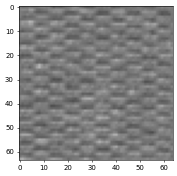

tf.Tensor(
[[[121. 121. 121.]
  [111. 111. 111.]
  [113. 113. 113.]
  ...
  [129. 129. 129.]
  [132. 132. 132.]
  [127. 127. 127.]]

 [[134. 134. 134.]
  [139. 139. 139.]
  [137. 137. 137.]
  ...
  [117. 117. 117.]
  [124. 124. 124.]
  [121. 121. 121.]]

 [[124. 124. 124.]
  [119. 119. 119.]
  [115. 115. 115.]
  ...
  [ 92.  92.  92.]
  [107. 107. 107.]
  [120. 120. 120.]]

 ...

 [[107. 107. 107.]
  [105. 105. 105.]
  [102. 102. 102.]
  ...
  [143. 143. 143.]
  [140. 140. 140.]
  [121. 121. 121.]]

 [[119. 119. 119.]
  [131. 131. 131.]
  [123. 123. 123.]
  ...
  [132. 132. 132.]
  [129. 129. 129.]
  [109. 109. 109.]]

 [[165. 165. 165.]
  [175. 175. 175.]
  [156. 156. 156.]
  ...
  [133. 133. 133.]
  [120. 120. 120.]
  [120. 120. 120.]]], shape=(64, 64, 3), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
-----------------------------


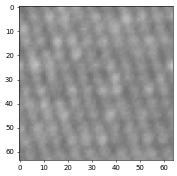

tf.Tensor(
[[[131. 131. 131.]
  [114. 114. 114.]
  [124. 124. 124.]
  ...
  [152. 152. 152.]
  [143. 143. 143.]
  [146. 146. 146.]]

 [[122. 122. 122.]
  [121. 121. 121.]
  [121. 121. 121.]
  ...
  [144. 144. 144.]
  [153. 153. 153.]
  [144. 144. 144.]]

 [[129. 129. 129.]
  [115. 115. 115.]
  [119. 119. 119.]
  ...
  [147. 147. 147.]
  [151. 151. 151.]
  [156. 156. 156.]]

 ...

 [[134. 134. 134.]
  [130. 130. 130.]
  [135. 135. 135.]
  ...
  [149. 149. 149.]
  [141. 141. 141.]
  [139. 139. 139.]]

 [[122. 122. 122.]
  [129. 129. 129.]
  [131. 131. 131.]
  ...
  [148. 148. 148.]
  [143. 143. 143.]
  [141. 141. 141.]]

 [[127. 127. 127.]
  [126. 126. 126.]
  [123. 123. 123.]
  ...
  [140. 140. 140.]
  [153. 153. 153.]
  [153. 153. 153.]]], shape=(64, 64, 3), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
-----------------------------


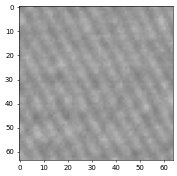

tf.Tensor(
[[[128. 128. 128.]
  [142. 142. 142.]
  [147. 147. 147.]
  ...
  [158. 158. 158.]
  [156. 156. 156.]
  [153. 153. 153.]]

 [[145. 145. 145.]
  [141. 141. 141.]
  [149. 149. 149.]
  ...
  [152. 152. 152.]
  [158. 158. 158.]
  [155. 155. 155.]]

 [[156. 156. 156.]
  [146. 146. 146.]
  [151. 151. 151.]
  ...
  [152. 152. 152.]
  [166. 166. 166.]
  [169. 169. 169.]]

 ...

 [[175. 175. 175.]
  [172. 172. 172.]
  [144. 144. 144.]
  ...
  [150. 150. 150.]
  [147. 147. 147.]
  [165. 165. 165.]]

 [[172. 172. 172.]
  [166. 166. 166.]
  [163. 163. 163.]
  ...
  [143. 143. 143.]
  [151. 151. 151.]
  [152. 152. 152.]]

 [[159. 159. 159.]
  [170. 170. 170.]
  [166. 166. 166.]
  ...
  [148. 148. 148.]
  [134. 134. 134.]
  [155. 155. 155.]]], shape=(64, 64, 3), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
-----------------------------


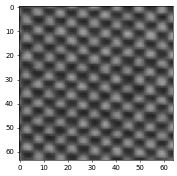

tf.Tensor(
[[[ 82.  82.  82.]
  [ 62.  62.  62.]
  [ 70.  70.  70.]
  ...
  [ 82.  82.  82.]
  [ 55.  55.  55.]
  [ 52.  52.  52.]]

 [[102. 102. 102.]
  [ 59.  59.  59.]
  [ 42.  42.  42.]
  ...
  [ 93.  93.  93.]
  [ 56.  56.  56.]
  [ 52.  52.  52.]]

 [[108. 108. 108.]
  [ 71.  71.  71.]
  [ 60.  60.  60.]
  ...
  [ 95.  95.  95.]
  [ 77.  77.  77.]
  [ 73.  73.  73.]]

 ...

 [[108. 108. 108.]
  [ 62.  62.  62.]
  [ 47.  47.  47.]
  ...
  [102. 102. 102.]
  [ 59.  59.  59.]
  [ 46.  46.  46.]]

 [[111. 111. 111.]
  [ 75.  75.  75.]
  [ 54.  54.  54.]
  ...
  [102. 102. 102.]
  [ 69.  69.  69.]
  [ 65.  65.  65.]]

 [[100. 100. 100.]
  [ 78.  78.  78.]
  [ 68.  68.  68.]
  ...
  [ 84.  84.  84.]
  [100. 100. 100.]
  [104. 104. 104.]]], shape=(64, 64, 3), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
-----------------------------


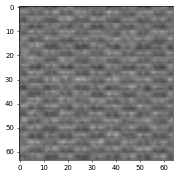

tf.Tensor(
[[[ 88.  88.  88.]
  [ 78.  78.  78.]
  [ 81.  81.  81.]
  ...
  [120. 120. 120.]
  [ 89.  89.  89.]
  [ 85.  85.  85.]]

 [[110. 110. 110.]
  [130. 130. 130.]
  [125. 125. 125.]
  ...
  [115. 115. 115.]
  [106. 106. 106.]
  [109. 109. 109.]]

 [[132. 132. 132.]
  [136. 136. 136.]
  [139. 139. 139.]
  ...
  [134. 134. 134.]
  [149. 149. 149.]
  [142. 142. 142.]]

 ...

 [[107. 107. 107.]
  [101. 101. 101.]
  [109. 109. 109.]
  ...
  [112. 112. 112.]
  [ 98.  98.  98.]
  [109. 109. 109.]]

 [[ 88.  88.  88.]
  [ 93.  93.  93.]
  [ 91.  91.  91.]
  ...
  [113. 113. 113.]
  [ 90.  90.  90.]
  [ 88.  88.  88.]]

 [[109. 109. 109.]
  [121. 121. 121.]
  [103. 103. 103.]
  ...
  [105. 105. 105.]
  [ 91.  91.  91.]
  [ 91.  91.  91.]]], shape=(64, 64, 3), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
-----------------------------


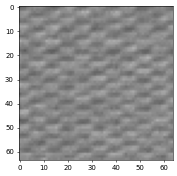

tf.Tensor(
[[[104. 104. 104.]
  [111. 111. 111.]
  [113. 113. 113.]
  ...
  [124. 124. 124.]
  [120. 120. 120.]
  [111. 111. 111.]]

 [[117. 117. 117.]
  [120. 120. 120.]
  [124. 124. 124.]
  ...
  [120. 120. 120.]
  [117. 117. 117.]
  [113. 113. 113.]]

 [[142. 142. 142.]
  [150. 150. 150.]
  [153. 153. 153.]
  ...
  [133. 133. 133.]
  [137. 137. 137.]
  [144. 144. 144.]]

 ...

 [[146. 146. 146.]
  [151. 151. 151.]
  [155. 155. 155.]
  ...
  [140. 140. 140.]
  [155. 155. 155.]
  [162. 162. 162.]]

 [[145. 145. 145.]
  [143. 143. 143.]
  [142. 142. 142.]
  ...
  [130. 130. 130.]
  [148. 148. 148.]
  [149. 149. 149.]]

 [[140. 140. 140.]
  [139. 139. 139.]
  [141. 141. 141.]
  ...
  [133. 133. 133.]
  [139. 139. 139.]
  [145. 145. 145.]]], shape=(64, 64, 3), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
-----------------------------


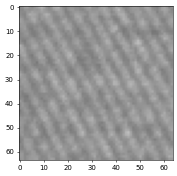

tf.Tensor(
[[[138. 138. 138.]
  [144. 144. 144.]
  [159. 159. 159.]
  ...
  [157. 157. 157.]
  [136. 136. 136.]
  [143. 143. 143.]]

 [[137. 137. 137.]
  [136. 136. 136.]
  [149. 149. 149.]
  ...
  [161. 161. 161.]
  [150. 150. 150.]
  [135. 135. 135.]]

 [[140. 140. 140.]
  [139. 139. 139.]
  [139. 139. 139.]
  ...
  [157. 157. 157.]
  [143. 143. 143.]
  [139. 139. 139.]]

 ...

 [[154. 154. 154.]
  [153. 153. 153.]
  [136. 136. 136.]
  ...
  [161. 161. 161.]
  [159. 159. 159.]
  [163. 163. 163.]]

 [[154. 154. 154.]
  [152. 152. 152.]
  [138. 138. 138.]
  ...
  [156. 156. 156.]
  [174. 174. 174.]
  [169. 169. 169.]]

 [[148. 148. 148.]
  [151. 151. 151.]
  [138. 138. 138.]
  ...
  [141. 141. 141.]
  [156. 156. 156.]
  [156. 156. 156.]]], shape=(64, 64, 3), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
-----------------------------


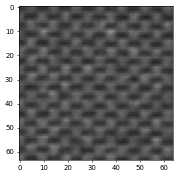

tf.Tensor(
[[[ 54.  54.  54.]
  [ 54.  54.  54.]
  [ 63.  63.  63.]
  ...
  [ 98.  98.  98.]
  [104. 104. 104.]
  [ 92.  92.  92.]]

 [[ 55.  55.  55.]
  [ 55.  55.  55.]
  [ 59.  59.  59.]
  ...
  [ 87.  87.  87.]
  [ 88.  88.  88.]
  [ 74.  74.  74.]]

 [[ 69.  69.  69.]
  [ 76.  76.  76.]
  [ 70.  70.  70.]
  ...
  [ 75.  75.  75.]
  [ 77.  77.  77.]
  [ 68.  68.  68.]]

 ...

 [[ 86.  86.  86.]
  [ 88.  88.  88.]
  [ 87.  87.  87.]
  ...
  [ 97.  97.  97.]
  [ 94.  94.  94.]
  [ 85.  85.  85.]]

 [[105. 105. 105.]
  [105. 105. 105.]
  [ 76.  76.  76.]
  ...
  [ 82.  82.  82.]
  [ 76.  76.  76.]
  [ 75.  75.  75.]]

 [[102. 102. 102.]
  [ 91.  91.  91.]
  [ 69.  69.  69.]
  ...
  [ 50.  50.  50.]
  [ 56.  56.  56.]
  [ 56.  56.  56.]]], shape=(64, 64, 3), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
-----------------------------


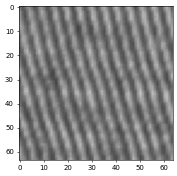

tf.Tensor(
[[[110. 110. 110.]
  [ 86.  86.  86.]
  [109. 109. 109.]
  ...
  [177. 177. 177.]
  [146. 146. 146.]
  [106. 106. 106.]]

 [[126. 126. 126.]
  [ 87.  87.  87.]
  [ 92.  92.  92.]
  ...
  [169. 169. 169.]
  [161. 161. 161.]
  [103. 103. 103.]]

 [[145. 145. 145.]
  [100. 100. 100.]
  [ 84.  84.  84.]
  ...
  [159. 159. 159.]
  [169. 169. 169.]
  [119. 119. 119.]]

 ...

 [[167. 167. 167.]
  [132. 132. 132.]
  [103. 103. 103.]
  ...
  [101. 101. 101.]
  [125. 125. 125.]
  [139. 139. 139.]]

 [[161. 161. 161.]
  [140. 140. 140.]
  [117. 117. 117.]
  ...
  [ 86.  86.  86.]
  [112. 112. 112.]
  [150. 150. 150.]]

 [[147. 147. 147.]
  [147. 147. 147.]
  [129. 129. 129.]
  ...
  [ 90.  90.  90.]
  [109. 109. 109.]
  [156. 156. 156.]]], shape=(64, 64, 3), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
-----------------------------


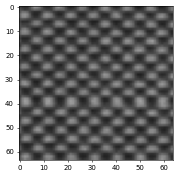

tf.Tensor(
[[[ 66.  66.  66.]
  [ 53.  53.  53.]
  [ 49.  49.  49.]
  ...
  [ 62.  62.  62.]
  [ 96.  96.  96.]
  [119. 119. 119.]]

 [[ 78.  78.  78.]
  [ 69.  69.  69.]
  [ 57.  57.  57.]
  ...
  [ 62.  62.  62.]
  [ 93.  93.  93.]
  [121. 121. 121.]]

 [[ 91.  91.  91.]
  [114. 114. 114.]
  [113. 113. 113.]
  ...
  [ 60.  60.  60.]
  [ 67.  67.  67.]
  [ 76.  76.  76.]]

 ...

 [[ 69.  69.  69.]
  [101. 101. 101.]
  [115. 115. 115.]
  ...
  [ 89.  89.  89.]
  [ 62.  62.  62.]
  [ 56.  56.  56.]]

 [[ 90.  90.  90.]
  [130. 130. 130.]
  [149. 149. 149.]
  ...
  [111. 111. 111.]
  [ 74.  74.  74.]
  [ 46.  46.  46.]]

 [[ 90.  90.  90.]
  [111. 111. 111.]
  [134. 134. 134.]
  ...
  [111. 111. 111.]
  [ 85.  85.  85.]
  [ 52.  52.  52.]]], shape=(64, 64, 3), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
-----------------------------


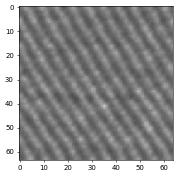

tf.Tensor(
[[[116. 116. 116.]
  [133. 133. 133.]
  [153. 153. 153.]
  ...
  [155. 155. 155.]
  [119. 119. 119.]
  [ 99.  99.  99.]]

 [[103. 103. 103.]
  [112. 112. 112.]
  [145. 145. 145.]
  ...
  [145. 145. 145.]
  [119. 119. 119.]
  [105. 105. 105.]]

 [[100. 100. 100.]
  [ 99.  99.  99.]
  [114. 114. 114.]
  ...
  [130. 130. 130.]
  [123. 123. 123.]
  [ 99.  99.  99.]]

 ...

 [[ 95.  95.  95.]
  [101. 101. 101.]
  [126. 126. 126.]
  ...
  [137. 137. 137.]
  [117. 117. 117.]
  [103. 103. 103.]]

 [[ 89.  89.  89.]
  [ 96.  96.  96.]
  [112. 112. 112.]
  ...
  [139. 139. 139.]
  [142. 142. 142.]
  [114. 114. 114.]]

 [[104. 104. 104.]
  [ 91.  91.  91.]
  [111. 111. 111.]
  ...
  [137. 137. 137.]
  [144. 144. 144.]
  [123. 123. 123.]]], shape=(64, 64, 3), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
-----------------------------


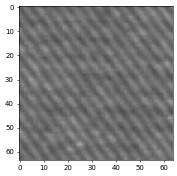

tf.Tensor(
[[[ 96.  96.  96.]
  [107. 107. 107.]
  [126. 126. 126.]
  ...
  [ 90.  90.  90.]
  [ 99.  99.  99.]
  [128. 128. 128.]]

 [[ 92.  92.  92.]
  [ 91.  91.  91.]
  [117. 117. 117.]
  ...
  [ 98.  98.  98.]
  [ 93.  93.  93.]
  [107. 107. 107.]]

 [[107. 107. 107.]
  [ 89.  89.  89.]
  [100. 100. 100.]
  ...
  [122. 122. 122.]
  [105. 105. 105.]
  [ 92.  92.  92.]]

 ...

 [[106. 106. 106.]
  [112. 112. 112.]
  [127. 127. 127.]
  ...
  [107. 107. 107.]
  [119. 119. 119.]
  [126. 126. 126.]]

 [[ 99.  99.  99.]
  [100. 100. 100.]
  [118. 118. 118.]
  ...
  [101. 101. 101.]
  [107. 107. 107.]
  [130. 130. 130.]]

 [[ 99.  99.  99.]
  [100. 100. 100.]
  [118. 118. 118.]
  ...
  [107. 107. 107.]
  [ 97.  97.  97.]
  [106. 106. 106.]]], shape=(64, 64, 3), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
-----------------------------


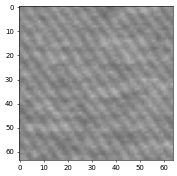

tf.Tensor(
[[[127. 127. 127.]
  [134. 134. 134.]
  [144. 144. 144.]
  ...
  [157. 157. 157.]
  [149. 149. 149.]
  [142. 142. 142.]]

 [[136. 136. 136.]
  [130. 130. 130.]
  [135. 135. 135.]
  ...
  [143. 143. 143.]
  [150. 150. 150.]
  [143. 143. 143.]]

 [[148. 148. 148.]
  [138. 138. 138.]
  [136. 136. 136.]
  ...
  [134. 134. 134.]
  [143. 143. 143.]
  [138. 138. 138.]]

 ...

 [[130. 130. 130.]
  [138. 138. 138.]
  [142. 142. 142.]
  ...
  [130. 130. 130.]
  [138. 138. 138.]
  [141. 141. 141.]]

 [[140. 140. 140.]
  [161. 161. 161.]
  [147. 147. 147.]
  ...
  [130. 130. 130.]
  [126. 126. 126.]
  [134. 134. 134.]]

 [[147. 147. 147.]
  [153. 153. 153.]
  [159. 159. 159.]
  ...
  [153. 153. 153.]
  [149. 149. 149.]
  [136. 136. 136.]]], shape=(64, 64, 3), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
-----------------------------


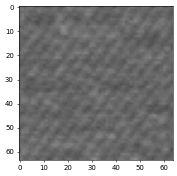

tf.Tensor(
[[[114. 114. 114.]
  [110. 110. 110.]
  [103. 103. 103.]
  ...
  [ 98.  98.  98.]
  [107. 107. 107.]
  [103. 103. 103.]]

 [[115. 115. 115.]
  [119. 119. 119.]
  [112. 112. 112.]
  ...
  [110. 110. 110.]
  [101. 101. 101.]
  [ 90.  90.  90.]]

 [[106. 106. 106.]
  [107. 107. 107.]
  [111. 111. 111.]
  ...
  [106. 106. 106.]
  [ 94.  94.  94.]
  [ 89.  89.  89.]]

 ...

 [[114. 114. 114.]
  [120. 120. 120.]
  [120. 120. 120.]
  ...
  [ 95.  95.  95.]
  [ 88.  88.  88.]
  [ 98.  98.  98.]]

 [[117. 117. 117.]
  [106. 106. 106.]
  [100. 100. 100.]
  ...
  [ 85.  85.  85.]
  [ 88.  88.  88.]
  [ 97.  97.  97.]]

 [[119. 119. 119.]
  [107. 107. 107.]
  [ 98.  98.  98.]
  ...
  [ 93.  93.  93.]
  [102. 102. 102.]
  [103. 103. 103.]]], shape=(64, 64, 3), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
-----------------------------


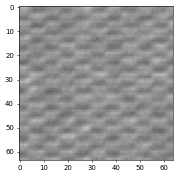

tf.Tensor(
[[[169. 169. 169.]
  [176. 176. 176.]
  [184. 184. 184.]
  ...
  [146. 146. 146.]
  [161. 161. 161.]
  [165. 165. 165.]]

 [[159. 159. 159.]
  [167. 167. 167.]
  [169. 169. 169.]
  ...
  [149. 149. 149.]
  [150. 150. 150.]
  [161. 161. 161.]]

 [[160. 160. 160.]
  [148. 148. 148.]
  [157. 157. 157.]
  ...
  [155. 155. 155.]
  [152. 152. 152.]
  [148. 148. 148.]]

 ...

 [[108. 108. 108.]
  [109. 109. 109.]
  [116. 116. 116.]
  ...
  [121. 121. 121.]
  [118. 118. 118.]
  [116. 116. 116.]]

 [[120. 120. 120.]
  [127. 127. 127.]
  [133. 133. 133.]
  ...
  [123. 123. 123.]
  [125. 125. 125.]
  [127. 127. 127.]]

 [[147. 147. 147.]
  [156. 156. 156.]
  [153. 153. 153.]
  ...
  [127. 127. 127.]
  [145. 145. 145.]
  [151. 151. 151.]]], shape=(64, 64, 3), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
-----------------------------


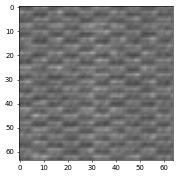

tf.Tensor(
[[[ 88.  88.  88.]
  [ 91.  91.  91.]
  [ 96.  96.  96.]
  ...
  [115. 115. 115.]
  [122. 122. 122.]
  [111. 111. 111.]]

 [[104. 104. 104.]
  [108. 108. 108.]
  [100. 100. 100.]
  ...
  [109. 109. 109.]
  [100. 100. 100.]
  [ 96.  96.  96.]]

 [[149. 149. 149.]
  [142. 142. 142.]
  [128. 128. 128.]
  ...
  [107. 107. 107.]
  [ 96.  96.  96.]
  [109. 109. 109.]]

 ...

 [[109. 109. 109.]
  [107. 107. 107.]
  [125. 125. 125.]
  ...
  [ 92.  92.  92.]
  [102. 102. 102.]
  [105. 105. 105.]]

 [[ 99.  99.  99.]
  [115. 115. 115.]
  [123. 123. 123.]
  ...
  [131. 131. 131.]
  [135. 135. 135.]
  [113. 113. 113.]]

 [[ 85.  85.  85.]
  [ 96.  96.  96.]
  [ 96.  96.  96.]
  ...
  [115. 115. 115.]
  [117. 117. 117.]
  [ 97.  97.  97.]]], shape=(64, 64, 3), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
-----------------------------


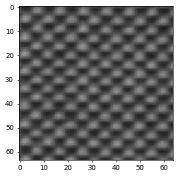

tf.Tensor(
[[[ 65.  65.  65.]
  [ 43.  43.  43.]
  [ 39.  39.  39.]
  ...
  [ 73.  73.  73.]
  [ 67.  67.  67.]
  [ 72.  72.  72.]]

 [[ 83.  83.  83.]
  [ 54.  54.  54.]
  [ 44.  44.  44.]
  ...
  [ 37.  37.  37.]
  [ 53.  53.  53.]
  [ 83.  83.  83.]]

 [[ 81.  81.  81.]
  [ 75.  75.  75.]
  [ 73.  73.  73.]
  ...
  [ 39.  39.  39.]
  [ 61.  61.  61.]
  [104. 104. 104.]]

 ...

 [[ 76.  76.  76.]
  [ 68.  68.  68.]
  [ 67.  67.  67.]
  ...
  [ 67.  67.  67.]
  [ 90.  90.  90.]
  [127. 127. 127.]]

 [[ 66.  66.  66.]
  [101. 101. 101.]
  [118. 118. 118.]
  ...
  [ 82.  82.  82.]
  [ 98.  98.  98.]
  [114. 114. 114.]]

 [[ 93.  93.  93.]
  [128. 128. 128.]
  [150. 150. 150.]
  ...
  [ 91.  91.  91.]
  [ 74.  74.  74.]
  [ 66.  66.  66.]]], shape=(64, 64, 3), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
-----------------------------


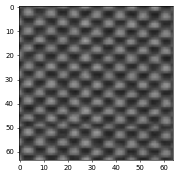

tf.Tensor(
[[[ 92.  92.  92.]
  [ 78.  78.  78.]
  [ 79.  79.  79.]
  ...
  [ 41.  41.  41.]
  [ 49.  49.  49.]
  [ 80.  80.  80.]]

 [[ 56.  56.  56.]
  [ 72.  72.  72.]
  [113. 113. 113.]
  ...
  [ 70.  70.  70.]
  [ 69.  69.  69.]
  [ 91.  91.  91.]]

 [[ 52.  52.  52.]
  [ 83.  83.  83.]
  [125. 125. 125.]
  ...
  [ 91.  91.  91.]
  [ 85.  85.  85.]
  [ 76.  76.  76.]]

 ...

 [[ 79.  79.  79.]
  [ 75.  75.  75.]
  [ 91.  91.  91.]
  ...
  [130. 130. 130.]
  [119. 119. 119.]
  [ 76.  76.  76.]]

 [[109. 109. 109.]
  [ 68.  68.  68.]
  [ 39.  39.  39.]
  ...
  [ 99.  99.  99.]
  [ 85.  85.  85.]
  [ 72.  72.  72.]]

 [[125. 125. 125.]
  [ 77.  77.  77.]
  [ 50.  50.  50.]
  ...
  [ 42.  42.  42.]
  [ 49.  49.  49.]
  [ 60.  60.  60.]]], shape=(64, 64, 3), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
-----------------------------


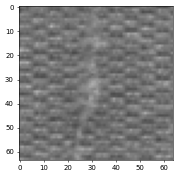

tf.Tensor(
[[[103. 103. 103.]
  [117. 117. 117.]
  [113. 113. 113.]
  ...
  [ 88.  88.  88.]
  [103. 103. 103.]
  [126. 126. 126.]]

 [[ 79.  79.  79.]
  [ 96.  96.  96.]
  [105. 105. 105.]
  ...
  [121. 121. 121.]
  [117. 117. 117.]
  [116. 116. 116.]]

 [[ 93.  93.  93.]
  [116. 116. 116.]
  [121. 121. 121.]
  ...
  [127. 127. 127.]
  [114. 114. 114.]
  [ 93.  93.  93.]]

 ...

 [[102. 102. 102.]
  [101. 101. 101.]
  [115. 115. 115.]
  ...
  [113. 113. 113.]
  [126. 126. 126.]
  [130. 130. 130.]]

 [[100. 100. 100.]
  [102. 102. 102.]
  [ 96.  96.  96.]
  ...
  [151. 151. 151.]
  [163. 163. 163.]
  [137. 137. 137.]]

 [[147. 147. 147.]
  [141. 141. 141.]
  [126. 126. 126.]
  ...
  [122. 122. 122.]
  [115. 115. 115.]
  [107. 107. 107.]]], shape=(64, 64, 3), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
-----------------------------


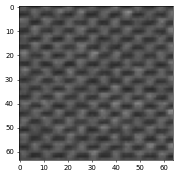

tf.Tensor(
[[[ 81.  81.  81.]
  [ 89.  89.  89.]
  [ 91.  91.  91.]
  ...
  [ 65.  65.  65.]
  [ 56.  56.  56.]
  [ 59.  59.  59.]]

 [[ 84.  84.  84.]
  [ 89.  89.  89.]
  [ 86.  86.  86.]
  ...
  [ 70.  70.  70.]
  [ 81.  81.  81.]
  [ 86.  86.  86.]]

 [[ 63.  63.  63.]
  [ 61.  61.  61.]
  [ 64.  64.  64.]
  ...
  [ 78.  78.  78.]
  [ 95.  95.  95.]
  [111. 111. 111.]]

 ...

 [[ 75.  75.  75.]
  [ 99.  99.  99.]
  [ 94.  94.  94.]
  ...
  [ 92.  92.  92.]
  [ 74.  74.  74.]
  [ 71.  71.  71.]]

 [[ 73.  73.  73.]
  [ 86.  86.  86.]
  [ 88.  88.  88.]
  ...
  [ 65.  65.  65.]
  [ 45.  45.  45.]
  [ 42.  42.  42.]]

 [[ 70.  70.  70.]
  [ 79.  79.  79.]
  [ 77.  77.  77.]
  ...
  [ 67.  67.  67.]
  [ 59.  59.  59.]
  [ 61.  61.  61.]]], shape=(64, 64, 3), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
-----------------------------


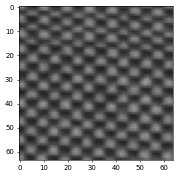

tf.Tensor(
[[[134. 134. 134.]
  [131. 131. 131.]
  [102. 102. 102.]
  ...
  [110. 110. 110.]
  [120. 120. 120.]
  [107. 107. 107.]]

 [[ 83.  83.  83.]
  [ 89.  89.  89.]
  [ 77.  77.  77.]
  ...
  [ 54.  54.  54.]
  [ 52.  52.  52.]
  [ 59.  59.  59.]]

 [[ 54.  54.  54.]
  [ 54.  54.  54.]
  [ 54.  54.  54.]
  ...
  [ 44.  44.  44.]
  [ 38.  38.  38.]
  [ 38.  38.  38.]]

 ...

 [[ 91.  91.  91.]
  [ 96.  96.  96.]
  [ 69.  69.  69.]
  ...
  [132. 132. 132.]
  [125. 125. 125.]
  [100. 100. 100.]]

 [[125. 125. 125.]
  [117. 117. 117.]
  [ 73.  73.  73.]
  ...
  [145. 145. 145.]
  [137. 137. 137.]
  [111. 111. 111.]]

 [[118. 118. 118.]
  [117. 117. 117.]
  [ 77.  77.  77.]
  ...
  [121. 121. 121.]
  [120. 120. 120.]
  [103. 103. 103.]]], shape=(64, 64, 3), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
-----------------------------


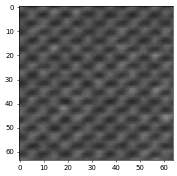

tf.Tensor(
[[[101. 101. 101.]
  [ 88.  88.  88.]
  [ 78.  78.  78.]
  ...
  [ 64.  64.  64.]
  [ 68.  68.  68.]
  [ 76.  76.  76.]]

 [[ 91.  91.  91.]
  [ 86.  86.  86.]
  [ 79.  79.  79.]
  ...
  [ 86.  86.  86.]
  [ 83.  83.  83.]
  [ 86.  86.  86.]]

 [[ 64.  64.  64.]
  [ 67.  67.  67.]
  [ 69.  69.  69.]
  ...
  [ 92.  92.  92.]
  [ 90.  90.  90.]
  [ 78.  78.  78.]]

 ...

 [[ 48.  48.  48.]
  [ 52.  52.  52.]
  [ 59.  59.  59.]
  ...
  [ 93.  93.  93.]
  [ 90.  90.  90.]
  [ 74.  74.  74.]]

 [[ 66.  66.  66.]
  [ 69.  69.  69.]
  [ 75.  75.  75.]
  ...
  [ 91.  91.  91.]
  [ 81.  81.  81.]
  [ 70.  70.  70.]]

 [[ 98.  98.  98.]
  [100. 100. 100.]
  [101. 101. 101.]
  ...
  [ 83.  83.  83.]
  [ 75.  75.  75.]
  [ 71.  71.  71.]]], shape=(64, 64, 3), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
-----------------------------


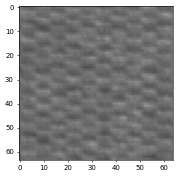

tf.Tensor(
[[[118. 118. 118.]
  [104. 104. 104.]
  [ 98.  98.  98.]
  ...
  [107. 107. 107.]
  [101. 101. 101.]
  [104. 104. 104.]]

 [[123. 123. 123.]
  [119. 119. 119.]
  [114. 114. 114.]
  ...
  [ 93.  93.  93.]
  [ 91.  91.  91.]
  [103. 103. 103.]]

 [[127. 127. 127.]
  [135. 135. 135.]
  [129. 129. 129.]
  ...
  [114. 114. 114.]
  [118. 118. 118.]
  [103. 103. 103.]]

 ...

 [[103. 103. 103.]
  [129. 129. 129.]
  [131. 131. 131.]
  ...
  [106. 106. 106.]
  [109. 109. 109.]
  [105. 105. 105.]]

 [[ 95.  95.  95.]
  [111. 111. 111.]
  [117. 117. 117.]
  ...
  [110. 110. 110.]
  [113. 113. 113.]
  [106. 106. 106.]]

 [[ 98.  98.  98.]
  [102. 102. 102.]
  [107. 107. 107.]
  ...
  [107. 107. 107.]
  [108. 108. 108.]
  [103. 103. 103.]]], shape=(64, 64, 3), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
-----------------------------


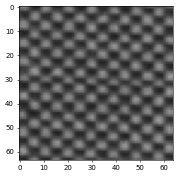

tf.Tensor(
[[[112. 112. 112.]
  [129. 129. 129.]
  [132. 132. 132.]
  ...
  [ 91.  91.  91.]
  [ 99.  99.  99.]
  [100. 100. 100.]]

 [[ 88.  88.  88.]
  [ 95.  95.  95.]
  [102. 102. 102.]
  ...
  [ 58.  58.  58.]
  [ 54.  54.  54.]
  [ 52.  52.  52.]]

 [[ 56.  56.  56.]
  [ 48.  48.  48.]
  [ 51.  51.  51.]
  ...
  [ 54.  54.  54.]
  [ 49.  49.  49.]
  [ 42.  42.  42.]]

 ...

 [[113. 113. 113.]
  [123. 123. 123.]
  [116. 116. 116.]
  ...
  [ 61.  61.  61.]
  [ 60.  60.  60.]
  [ 63.  63.  63.]]

 [[ 57.  57.  57.]
  [ 58.  58.  58.]
  [ 58.  58.  58.]
  ...
  [ 42.  42.  42.]
  [ 37.  37.  37.]
  [ 39.  39.  39.]]

 [[ 44.  44.  44.]
  [ 37.  37.  37.]
  [ 37.  37.  37.]
  ...
  [ 63.  63.  63.]
  [ 57.  57.  57.]
  [ 50.  50.  50.]]], shape=(64, 64, 3), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
-----------------------------


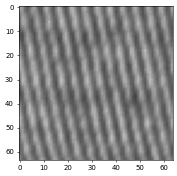

tf.Tensor(
[[[168. 168. 168.]
  [154. 154. 154.]
  [112. 112. 112.]
  ...
  [ 90.  90.  90.]
  [104. 104. 104.]
  [163. 163. 163.]]

 [[155. 155. 155.]
  [154. 154. 154.]
  [108. 108. 108.]
  ...
  [ 88.  88.  88.]
  [ 98.  98.  98.]
  [164. 164. 164.]]

 [[143. 143. 143.]
  [148. 148. 148.]
  [117. 117. 117.]
  ...
  [ 95.  95.  95.]
  [ 97.  97.  97.]
  [147. 147. 147.]]

 ...

 [[112. 112. 112.]
  [106. 106. 106.]
  [140. 140. 140.]
  ...
  [142. 142. 142.]
  [127. 127. 127.]
  [ 90.  90.  90.]]

 [[124. 124. 124.]
  [103. 103. 103.]
  [117. 117. 117.]
  ...
  [134. 134. 134.]
  [132. 132. 132.]
  [104. 104. 104.]]

 [[135. 135. 135.]
  [101. 101. 101.]
  [ 98.  98.  98.]
  ...
  [133. 133. 133.]
  [144. 144. 144.]
  [114. 114. 114.]]], shape=(64, 64, 3), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
-----------------------------


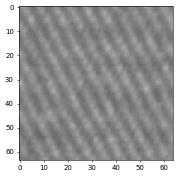

tf.Tensor(
[[[144. 144. 144.]
  [157. 157. 157.]
  [150. 150. 150.]
  ...
  [139. 139. 139.]
  [127. 127. 127.]
  [128. 128. 128.]]

 [[125. 125. 125.]
  [143. 143. 143.]
  [152. 152. 152.]
  ...
  [149. 149. 149.]
  [135. 135. 135.]
  [126. 126. 126.]]

 [[127. 127. 127.]
  [136. 136. 136.]
  [152. 152. 152.]
  ...
  [149. 149. 149.]
  [140. 140. 140.]
  [132. 132. 132.]]

 ...

 [[127. 127. 127.]
  [138. 138. 138.]
  [142. 142. 142.]
  ...
  [151. 151. 151.]
  [142. 142. 142.]
  [136. 136. 136.]]

 [[121. 121. 121.]
  [129. 129. 129.]
  [136. 136. 136.]
  ...
  [134. 134. 134.]
  [141. 141. 141.]
  [134. 134. 134.]]

 [[116. 116. 116.]
  [121. 121. 121.]
  [121. 121. 121.]
  ...
  [137. 137. 137.]
  [146. 146. 146.]
  [137. 137. 137.]]], shape=(64, 64, 3), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
-----------------------------


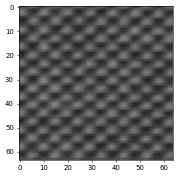

tf.Tensor(
[[[ 73.  73.  73.]
  [ 73.  73.  73.]
  [ 76.  76.  76.]
  ...
  [102. 102. 102.]
  [108. 108. 108.]
  [103. 103. 103.]]

 [[103. 103. 103.]
  [106. 106. 106.]
  [ 98.  98.  98.]
  ...
  [ 71.  71.  71.]
  [ 76.  76.  76.]
  [ 72.  72.  72.]]

 [[129. 129. 129.]
  [123. 123. 123.]
  [104. 104. 104.]
  ...
  [ 49.  49.  49.]
  [ 42.  42.  42.]
  [ 45.  45.  45.]]

 ...

 [[ 43.  43.  43.]
  [ 40.  40.  40.]
  [ 57.  57.  57.]
  ...
  [ 90.  90.  90.]
  [104. 104. 104.]
  [106. 106. 106.]]

 [[ 56.  56.  56.]
  [ 54.  54.  54.]
  [ 65.  65.  65.]
  ...
  [102. 102. 102.]
  [112. 112. 112.]
  [103. 103. 103.]]

 [[ 80.  80.  80.]
  [ 78.  78.  78.]
  [ 80.  80.  80.]
  ...
  [ 87.  87.  87.]
  [ 83.  83.  83.]
  [ 79.  79.  79.]]], shape=(64, 64, 3), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
-----------------------------


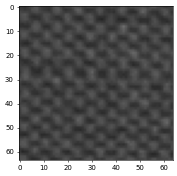

tf.Tensor(
[[[56. 56. 56.]
  [54. 54. 54.]
  [51. 51. 51.]
  ...
  [59. 59. 59.]
  [63. 63. 63.]
  [66. 66. 66.]]

 [[60. 60. 60.]
  [60. 60. 60.]
  [54. 54. 54.]
  ...
  [74. 74. 74.]
  [66. 66. 66.]
  [61. 61. 61.]]

 [[71. 71. 71.]
  [67. 67. 67.]
  [67. 67. 67.]
  ...
  [84. 84. 84.]
  [65. 65. 65.]
  [51. 51. 51.]]

 ...

 [[63. 63. 63.]
  [58. 58. 58.]
  [55. 55. 55.]
  ...
  [79. 79. 79.]
  [62. 62. 62.]
  [46. 46. 46.]]

 [[78. 78. 78.]
  [77. 77. 77.]
  [77. 77. 77.]
  ...
  [80. 80. 80.]
  [68. 68. 68.]
  [52. 52. 52.]]

 [[78. 78. 78.]
  [81. 81. 81.]
  [80. 80. 80.]
  ...
  [69. 69. 69.]
  [77. 77. 77.]
  [68. 68. 68.]]], shape=(64, 64, 3), dtype=float32)
tf.Tensor([0.], shape=(1,), dtype=float32)
-----------------------------


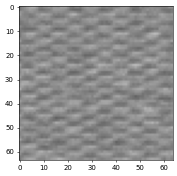

tf.Tensor(
[[[122. 122. 122.]
  [136. 136. 136.]
  [146. 146. 146.]
  ...
  [132. 132. 132.]
  [149. 149. 149.]
  [145. 145. 145.]]

 [[121. 121. 121.]
  [133. 133. 133.]
  [141. 141. 141.]
  ...
  [115. 115. 115.]
  [115. 115. 115.]
  [123. 123. 123.]]

 [[151. 151. 151.]
  [143. 143. 143.]
  [134. 134. 134.]
  ...
  [118. 118. 118.]
  [115. 115. 115.]
  [124. 124. 124.]]

 ...

 [[143. 143. 143.]
  [123. 123. 123.]
  [115. 115. 115.]
  ...
  [168. 168. 168.]
  [157. 157. 157.]
  [167. 167. 167.]]

 [[126. 126. 126.]
  [126. 126. 126.]
  [140. 140. 140.]
  ...
  [149. 149. 149.]
  [152. 152. 152.]
  [144. 144. 144.]]

 [[124. 124. 124.]
  [141. 141. 141.]
  [153. 153. 153.]
  ...
  [140. 140. 140.]
  [142. 142. 142.]
  [134. 134. 134.]]], shape=(64, 64, 3), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
-----------------------------


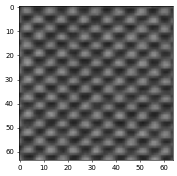

tf.Tensor(
[[[ 61.  61.  61.]
  [ 90.  90.  90.]
  [100. 100. 100.]
  ...
  [ 87.  87.  87.]
  [ 81.  81.  81.]
  [ 80.  80.  80.]]

 [[ 69.  69.  69.]
  [101. 101. 101.]
  [131. 131. 131.]
  ...
  [112. 112. 112.]
  [ 86.  86.  86.]
  [ 52.  52.  52.]]

 [[ 79.  79.  79.]
  [ 98.  98.  98.]
  [124. 124. 124.]
  ...
  [117. 117. 117.]
  [ 89.  89.  89.]
  [ 59.  59.  59.]]

 ...

 [[ 81.  81.  81.]
  [ 74.  74.  74.]
  [ 65.  65.  65.]
  ...
  [105. 105. 105.]
  [ 89.  89.  89.]
  [ 70.  70.  70.]]

 [[105. 105. 105.]
  [ 73.  73.  73.]
  [ 46.  46.  46.]
  ...
  [ 46.  46.  46.]
  [ 51.  51.  51.]
  [ 55.  55.  55.]]

 [[119. 119. 119.]
  [ 86.  86.  86.]
  [ 61.  61.  61.]
  ...
  [ 38.  38.  38.]
  [ 47.  47.  47.]
  [ 72.  72.  72.]]], shape=(64, 64, 3), dtype=float32)
tf.Tensor([1.], shape=(1,), dtype=float32)
-----------------------------


In [7]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [8,4]
plt.rcParams['figure.dpi']     = 50

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(0, len(images)):
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.show()
        print(images[i])
        print(labels[i])
        print("-----------------------------")
    

In [8]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [9]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(32, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])



In [10]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 64, 64, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        3

In [11]:
epochs=15
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    batch_size = 32,

)

Epoch 1/15
159/159 [==============================] - 12s 56ms/step - loss: 0.5307 - accuracy: 0.7551 - val_loss: 0.4043 - val_accuracy: 0.7880
Epoch 2/15
159/159 [==============================] - 9s 55ms/step - loss: 0.4999 - accuracy: 0.7607 - val_loss: 0.4589 - val_accuracy: 0.7808
Epoch 3/15
159/159 [==============================] - 8s 52ms/step - loss: 0.4639 - accuracy: 0.7717 - val_loss: 0.3730 - val_accuracy: 0.7818
Epoch 4/15
159/159 [==============================] - 9s 57ms/step - loss: 0.4195 - accuracy: 0.7763 - val_loss: 0.3476 - val_accuracy: 0.8221
Epoch 5/15
159/159 [==============================] - 8s 49ms/step - loss: 0.3907 - accuracy: 0.7857 - val_loss: 0.3053 - val_accuracy: 0.8532
Epoch 6/15
159/159 [==============================] - 8s 52ms/step - loss: 0.3658 - accuracy: 0.8059 - val_loss: 0.3077 - val_accuracy: 0.7818
Epoch 7/15
159/159 [==============================] - 8s 53ms/step - loss: 0.3268 - accuracy: 0.8434 - val_loss: 0.2592 - val_accuracy: 0.919

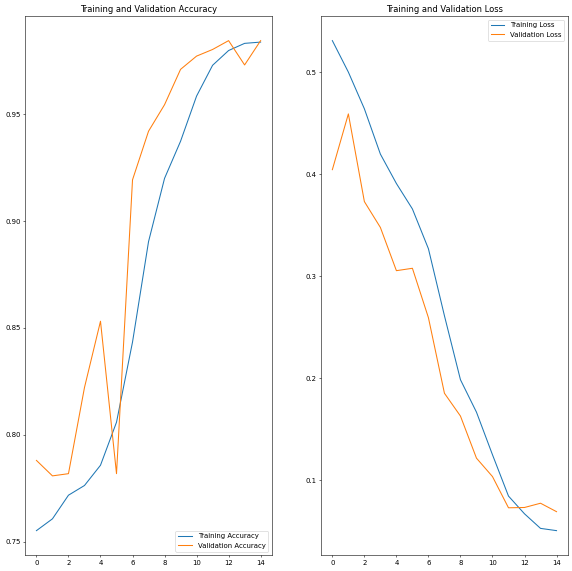

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(14, 14))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [13]:
result = model.evaluate(test_ds)
dict(zip(model.metrics_names, result))

18/18 [==============================] - 0s 15ms/step - loss: 0.0648 - accuracy: 0.9840


{'loss': 0.0648246556520462, 'accuracy': 0.9840425252914429}

In [14]:
# cwd = os.getcwd()
model.save("inspection_model")

#model.save_weights("inspection_weights")

INFO:tensorflow:Assets written to: inspection_model\assets


In [15]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
  ]
)

In [16]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  data_augmentation,
  layers.Conv2D(32, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(32, activation='relu'),
  layers.Dense(1, activation='sigmoid')
#   layers.Dense(1)
])



In [17]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 64, 64, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 64, 64, 3)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                  

In [18]:
epochs=15
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    batch_size = 32,

)

Epoch 1/15
159/159 [==============================] - 9s 50ms/step - loss: 0.5380 - accuracy: 0.7441 - val_loss: 0.3972 - val_accuracy: 0.8149
Epoch 2/15
159/159 [==============================] - 8s 50ms/step - loss: 0.5092 - accuracy: 0.7642 - val_loss: 0.4211 - val_accuracy: 0.7797
Epoch 3/15
159/159 [==============================] - 8s 50ms/step - loss: 0.4983 - accuracy: 0.7658 - val_loss: 0.3961 - val_accuracy: 0.7797
Epoch 4/15
159/159 [==============================] - 8s 49ms/step - loss: 0.4953 - accuracy: 0.7672 - val_loss: 0.4344 - val_accuracy: 0.7808
Epoch 5/15
159/159 [==============================] - 8s 49ms/step - loss: 0.4922 - accuracy: 0.7717 - val_loss: 0.4131 - val_accuracy: 0.8066
Epoch 6/15
159/159 [==============================] - 8s 50ms/step - loss: 0.4939 - accuracy: 0.7676 - val_loss: 0.4168 - val_accuracy: 0.7808
Epoch 7/15
159/159 [==============================] - 8s 49ms/step - loss: 0.4866 - accuracy: 0.7745 - val_loss: 0.4504 - val_accuracy: 0.7870

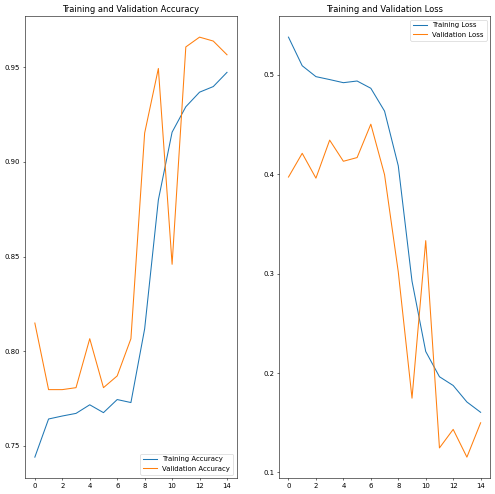

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [20]:
epochs=15
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    batch_size = 32,

)

Epoch 1/15
159/159 [==============================] - 8s 50ms/step - loss: 0.1633 - accuracy: 0.9443 - val_loss: 0.1344 - val_accuracy: 0.9648
Epoch 2/15
159/159 [==============================] - 8s 48ms/step - loss: 0.1552 - accuracy: 0.9475 - val_loss: 0.1283 - val_accuracy: 0.9741
Epoch 3/15
159/159 [==============================] - 8s 51ms/step - loss: 0.1486 - accuracy: 0.9483 - val_loss: 0.1164 - val_accuracy: 0.9772
Epoch 4/15
159/159 [==============================] - 8s 47ms/step - loss: 0.1399 - accuracy: 0.9518 - val_loss: 0.1027 - val_accuracy: 0.9648
Epoch 5/15
159/159 [==============================] - 8s 52ms/step - loss: 0.1296 - accuracy: 0.9568 - val_loss: 0.0910 - val_accuracy: 0.9814
Epoch 6/15
159/159 [==============================] - 7s 46ms/step - loss: 0.1290 - accuracy: 0.9564 - val_loss: 0.0880 - val_accuracy: 0.9783
Epoch 7/15
159/159 [==============================] - 9s 54ms/step - loss: 0.1208 - accuracy: 0.9611 - val_loss: 0.1336 - val_accuracy: 0.9607

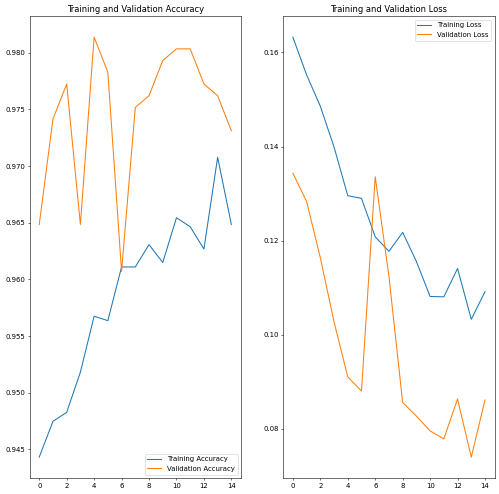

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [22]:
model.save("inspection_model_aug")


INFO:tensorflow:Assets written to: inspection_model_aug\assets


In [23]:
result = model.evaluate(test_ds)
dict(zip(model.metrics_names, result))

18/18 [==============================] - 0s 20ms/step - loss: 0.0850 - accuracy: 0.9787


{'loss': 0.08502594381570816, 'accuracy': 0.978723406791687}

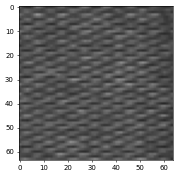

CNN output: [[0.5296958]]
This image most likely belongs to normal with a 52.97 percent confidence.
inference took: 0.16079339999123476 ms


In [24]:
path = "./test_data/defect/defect_0.png"

cv_img = cv2.imread(path)
plt.imshow(cv_img)
plt.show() 


img = tf.keras.utils.load_img(
    path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

start = time.perf_counter()

predictions = model.predict(img_array)

timeTaken = time.perf_counter() - start

p_class = class_names[int(np.rint(predictions[0]))]
confidence = predictions[0][0]
if int(np.rint(predictions[0])) == 0:
       confidence = 1 - predictions[0][0]
       

print("CNN output:", predictions)
    
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(p_class, 100 * confidence)
)
print("inference took:", timeTaken,"ms")

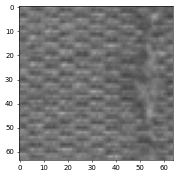

CNN output: [[0.05455777]]
This image most likely belongs to defect with a 94.54 percent confidence.
inference took: 0.05468339999788441 ms


In [25]:
path = "./test_data/defect/defect_1.png"

cv_img = cv2.imread(path)
plt.imshow(cv_img)
plt.show() 


img = tf.keras.utils.load_img(
    path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

start = time.perf_counter()

predictions = model.predict(img_array)

timeTaken = time.perf_counter() - start
p_class = class_names[int(np.rint(predictions[0]))]
confidence = predictions[0][0]
if int(np.rint(predictions[0])) == 0:
       confidence = 1 - predictions[0][0]
       

print("CNN output:", predictions)
    
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(p_class, 100 * confidence)
)

print("inference took:", timeTaken,"ms")

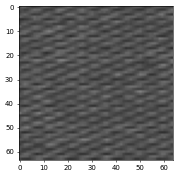

CNN output: [[0.6906686]]
This image most likely belongs to normal with a 69.07 percent confidence.
inference took: 0.05582579999463633 ms


In [26]:
path = "./test_data/normal/normal_0.png"

cv_img = cv2.imread(path)
plt.imshow(cv_img)
plt.show() 

img = tf.keras.utils.load_img(
    path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

start = time.perf_counter()

predictions = model.predict(img_array)

timeTaken = time.perf_counter() - start
p_class = class_names[int(np.rint(predictions[0]))]
confidence = predictions[0][0]
if int(np.rint(predictions[0])) == 0:
       confidence = 1 - predictions[0][0]
       

print("CNN output:", predictions)
    
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(p_class, 100 * confidence)
)

print("inference took:", timeTaken,"ms")

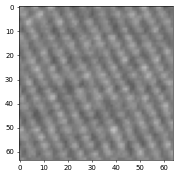

CNN output: [[0.9859115]]
This image most likely belongs to normal with a 98.59 percent confidence.
inference took: 0.053729900013422593 ms


In [27]:
path = "./test_data/normal/normal_1.png"


cv_img = cv2.imread(path)
plt.imshow(cv_img)
plt.show() 

img = tf.keras.utils.load_img(
    path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

start = time.perf_counter()

predictions = model.predict(img_array)

timeTaken = time.perf_counter() - start
p_class = class_names[int(np.rint(predictions[0]))]
confidence = predictions[0][0]
if int(np.rint(predictions[0])) == 0:
       confidence = 1 - predictions[0][0]
       

print("CNN output:", predictions)
    
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(p_class, 100 * confidence)
)

print("inference took:", timeTaken,"ms")

In [28]:
# dad got an accarcy of 93% on inspections machines without ai

# More Testing without data augmentation

In [29]:
# loading 


reconstructed_model = keras.models.load_model("inspection_model")


In [30]:

result = reconstructed_model.evaluate(test_ds)

dict(zip(reconstructed_model.metrics_names, result))

18/18 [==============================] - 1s 28ms/step - loss: 0.0648 - accuracy: 0.9840


{'loss': 0.0648246482014656, 'accuracy': 0.9840425252914429}

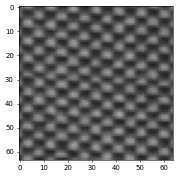

CNN output: [[0.03157276]]
This image most likely belongs to defect with a 96.84 percent confidence.
inference took: 0.15834460000041872 ms


In [31]:
path = "./test_data/defect/defect_20.png"

img = tf.keras.utils.load_img(
    path, target_size=(img_height, img_width)
)

cv_img = cv2.imread(path)
plt.imshow(cv_img)
plt.show() 


img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

start = time.perf_counter()
predictions = reconstructed_model.predict(img_array)
timeTaken = time.perf_counter() - start

# score = tf.nn.sigmoid(predictions[0])

p_class = class_names[int(np.rint(predictions[0]))]
confidence = predictions[0][0]
if int(np.rint(predictions[0])) == 0:
       confidence = 1 - predictions[0][0]
       

print("CNN output:", predictions)
    
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(p_class, 100 * confidence)
)

print("inference took:", timeTaken,"ms")

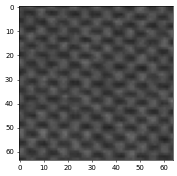

CNN output: [[0.99282235]]
This image most likely belongs to normal with a 99.28 percent confidence.
inference took: 0.07351280000875704 ms


In [32]:
path = "./tiles/normal/0001_000_00_7.png"

img = tf.keras.utils.load_img(
    path, target_size=(img_height, img_width)
)

cv_img = cv2.imread(path)
plt.imshow(cv_img)
plt.show() 


img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

start = time.perf_counter()
predictions = reconstructed_model.predict(img_array)
timeTaken = time.perf_counter() - start

# score = tf.nn.sigmoid(predictions[0])

p_class = class_names[int(np.rint(predictions[0]))]
confidence = predictions[0][0]
if int(np.rint(predictions[0])) == 0:
       confidence = 1 - predictions[0][0]
       

print("CNN output:", predictions)
    
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(p_class, 100 * confidence)
)

print("inference took:", timeTaken,"ms")

Have to change batchsize to properly inspect, not needed if data isnt shuffled

In [33]:
test_ds = keras.utils.image_dataset_from_directory(
    directory='test_data/',
    labels='inferred',
    label_mode='binary',
    batch_size=1,
    image_size=(img_height, img_width),
    shuffle=True
)

Found 564 files belonging to 2 classes.


In [34]:
model = reconstructed_model

preds = model.predict(test_ds,batch_size = 1,
verbose=1)

individualPredicts = []

TP = 0
TN = 0
FP = 0
FN = 0

names = os.listdir("./test_data/defect/")
for name in names:
    path = "./test_data/defect/"+name
    img = tf.keras.utils.load_img(
    path, target_size=(img_height, img_width)
    )
                   
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)

    p_class = int(np.rint(predictions[0]))
    individualPredicts.append(p_class)
    
    if p_class == 0:
        TP = TP + 1
    else:
        FP = FP + 1
        
    
    
    
names = os.listdir("./test_data/normal/")
for name in names:
    path = "./test_data/normal/"+name
    img = tf.keras.utils.load_img(
    path, target_size=(img_height, img_width)
    )
                   
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)

    p_class = int(np.rint(predictions[0]))
    individualPredicts.append(p_class)
    
    if p_class == 1:
        TN = TN + 1
    else:
        FN = FN + 1


# print(preds)
# print(individualPredicts)
print(TP, FP)
print(FN, TN)



564/564 [==============================] - 2s 3ms/step
85 3
6 470


In [35]:
predictions = []
targets  = []

start = time.perf_counter()

for image, target in test_ds:
    prediction = model.predict(image)
    targets.append(tf.get_static_value(target)[0][0])
    predictions.append(int(np.rint(prediction[0])))
    
taken = time.perf_counter() - start

print("time using single prediction:", taken)



time using single prediction: 27.208710599981714


[[ 85   3]
 [  6 470]]


<Figure size 1000x500 with 0 Axes>

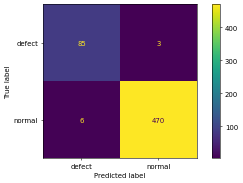

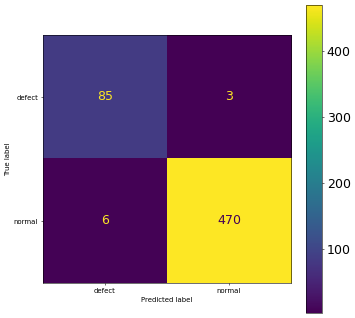

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(targets, predictions)
print(cm)

plt.figure(figsize=(20,10)) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_ds.class_names)
disp.plot()
plt.show()

f,ax = plt.subplots(1,1,figsize=(8,8))
plt.rcParams['font.size'] = 18
disp = ConfusionMatrixDisplay.from_predictions(targets,predictions, display_labels=test_ds.class_names, ax = ax)
plt.show()

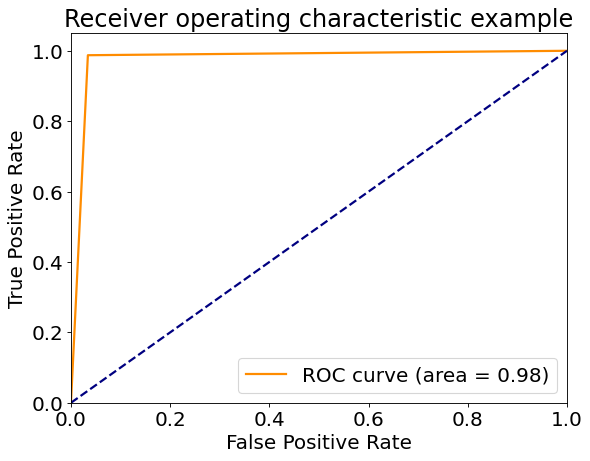

In [37]:
# y = np.concatenate([y for x, y in test_ds], axis=0)
# print(y)


fpr, tpr, _ = metrics.roc_curve(targets, predictions)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(8, 6), dpi=80)
lw = 2
plt.plot(fpr, tpr, color='darkorange',
lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [38]:
from sklearn.metrics import classification_report
 

print(classification_report(targets, predictions))

              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95        88
         1.0       0.99      0.99      0.99       476

    accuracy                           0.98       564
   macro avg       0.96      0.98      0.97       564
weighted avg       0.98      0.98      0.98       564



In [39]:

result = reconstructed_model.evaluate(all_ds)

dict(zip(reconstructed_model.metrics_names, result))

3570/3570 [==============================] - 101s 28ms/step - loss: 0.0459 - accuracy: 0.9877


{'loss': 0.0459461510181427, 'accuracy': 0.987733781337738}

In [40]:
all_ds = keras.utils.image_dataset_from_directory(
    directory='tiles/',
    labels='inferred',
    label_mode='binary',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=False
)

Found 114216 files belonging to 2 classes.


In [41]:
predictions = reconstructed_model.predict(all_ds)


roundedPredictions = []
for p in predictions:
    roundedPredictions.append(int(np.rint(p[0])))

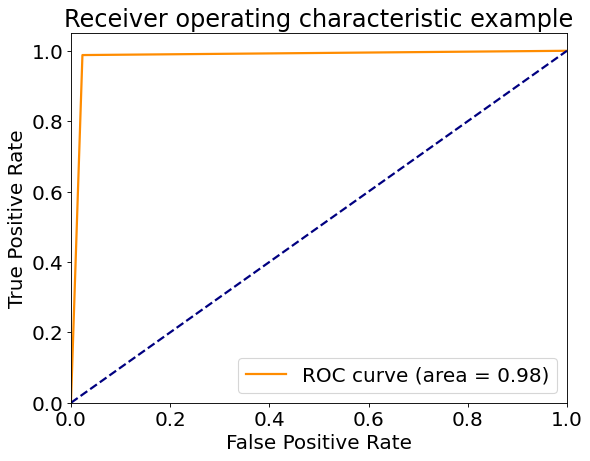

In [42]:
targets = np.concatenate([targets for features, targets in all_ds], axis=0)

fpr, tpr, _ = metrics.roc_curve(targets, roundedPredictions)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(8, 6), dpi=80)
lw = 2
plt.plot(fpr, tpr, color='darkorange',
lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

<Figure size 1000x500 with 0 Axes>

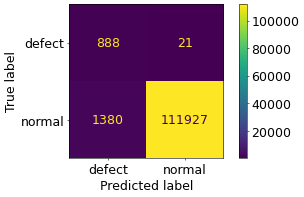

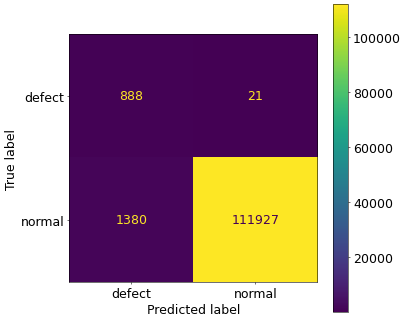

In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

targets = np.concatenate([targets for features, targets in all_ds], axis=0)


cm = confusion_matrix(targets, roundedPredictions)
#print(cm)

#print(100*(cm[1][0] / (cm[1][0]+cm[1][1])))

plt.figure(figsize=(20,10)) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_ds.class_names)
disp.plot()
plt.show()

f,ax = plt.subplots(1,1,figsize=(8,8))
plt.rcParams['font.size'] = 18
disp = ConfusionMatrixDisplay.from_predictions(targets,roundedPredictions, display_labels=test_ds.class_names, ax = ax)
plt.show()

# With Data Augmetation

In [44]:
reconstructed_model = keras.models.load_model("inspection_model_aug")


In [45]:
result = reconstructed_model.evaluate(all_ds)

dict(zip(reconstructed_model.metrics_names, result))

3570/3570 [==============================] - 88s 25ms/step - loss: 0.0361 - accuracy: 0.9928


{'loss': 0.03609213978052139, 'accuracy': 0.9927681088447571}

In [46]:
predictions = reconstructed_model.predict(all_ds)


roundedPredictions = []
for p in predictions:
    roundedPredictions.append(int(np.rint(p[0])))

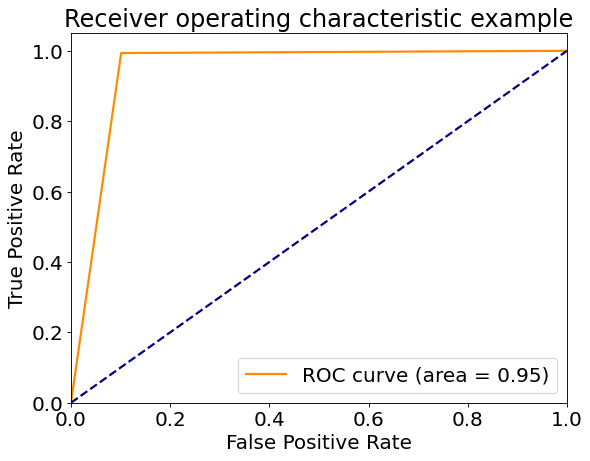

In [47]:
targets = np.concatenate([targets for features, targets in all_ds], axis=0)

fpr, tpr, _ = metrics.roc_curve(targets, roundedPredictions)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(8, 6), dpi=80)
lw = 2
plt.plot(fpr, tpr, color='darkorange',
lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [48]:
# print(classification_report(targets, predictions))

In [49]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

targets = np.concatenate([targets for features, targets in all_ds], axis=0)


cm = confusion_matrix(targets, roundedPredictions)
print(cm)

print(100*(cm[1][0] / (cm[1][0]+cm[1][1])))



[[   817     92]
 [   734 112573]]
0.6477975764957152


<Figure size 1000x500 with 0 Axes>

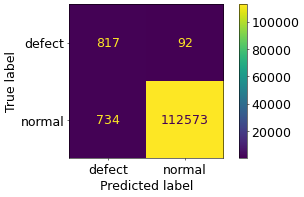

In [50]:
plt.figure(figsize=(20,10)) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_ds.class_names)
disp.plot()
plt.show()

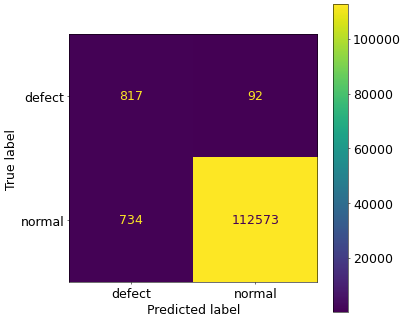

In [51]:
f,ax = plt.subplots(1,1,figsize=(8,8))
plt.rcParams['font.size'] = 18
disp = ConfusionMatrixDisplay.from_predictions(targets,roundedPredictions, display_labels=test_ds.class_names, ax = ax)
plt.show()

# With confidence 0.05 cutoff

In [52]:
predictions = reconstructed_model.predict(all_ds)

print("predictions done")



predictions done


In [53]:
roundedPredictions = []
for p in predictions:
    p_temp = 0
    if p[0] > 0.02:
        p_temp = 1
    roundedPredictions.append(p_temp)

[[   571    338]
 [    93 113214]]
0.08207789456962059


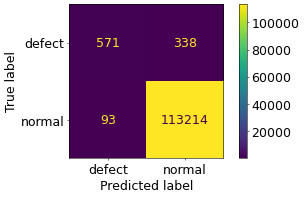

In [54]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

targets = np.concatenate([targets for features, targets in all_ds], axis=0)


cm = confusion_matrix(targets, roundedPredictions)
print(cm)

print(100*(cm[1][0] / (cm[1][0]+cm[1][1])))


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=all_ds.class_names)
disp.plot()
plt.show()

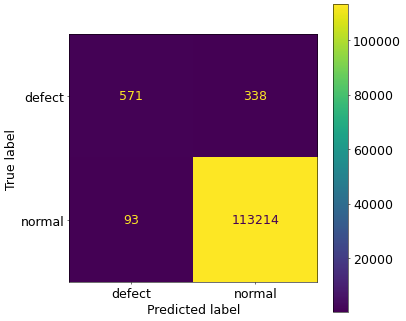

In [55]:
f,ax = plt.subplots(1,1,figsize=(8,8))
plt.rcParams['font.size'] = 18
disp = ConfusionMatrixDisplay.from_predictions(targets,roundedPredictions, display_labels=test_ds.class_names, ax = ax)
plt.show()

shuffel Off

In [56]:
test_ds = keras.utils.image_dataset_from_directory(
    directory='test_data/',
    labels='inferred',
    label_mode='binary',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=False
)

Found 564 files belonging to 2 classes.


In [57]:

start = time.perf_counter()
predictions = reconstructed_model.predict(test_ds)


roundedPredictions = []
for p in predictions:
    roundedPredictions.append(int(np.rint(p[0])))
    
taken = time.perf_counter() - start

print("time taken using batch prediction:", taken)


time taken using batch prediction: 0.534716499998467


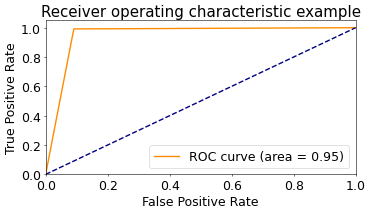

In [58]:
targets = np.concatenate([targets for features, targets in test_ds], axis=0)

fpr, tpr, _ = metrics.roc_curve(targets, roundedPredictions)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

[[ 80   8]
 [  4 472]]


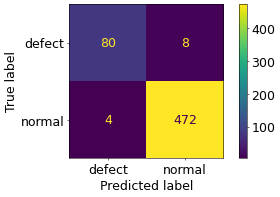

In [59]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(targets, roundedPredictions)
print(cm)



disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_ds.class_names)
disp.plot()
plt.show()

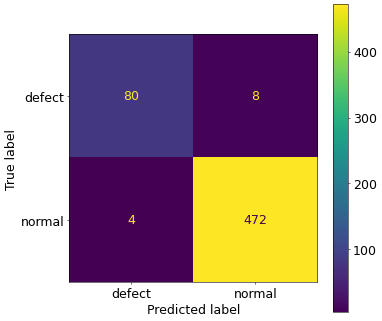

In [60]:
f,ax = plt.subplots(1,1,figsize=(8,8))
plt.rcParams['font.size'] = 18
disp = ConfusionMatrixDisplay.from_predictions(targets,roundedPredictions, display_labels=test_ds.class_names, ax = ax)
plt.show()

Checking opencv conversion

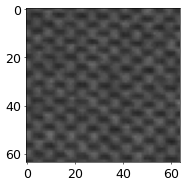

CNN output: [[0.9841737]]
This image most likely belongs to normal with a 98.42 percent confidence.
TensorFlow image prediction:  0.9841737
OpenCv image prediction:  0.9841737


In [61]:
path = "./tiles/normal/0001_000_00_7.png"

img = tf.keras.utils.load_img(
    path, target_size=(img_height, img_width)
)

cv_img = cv2.imread(path)
plt.imshow(cv_img)
plt.show() 


img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = reconstructed_model.predict(img_array)


p_class = class_names[int(np.rint(predictions[0]))]
confidence = predictions[0][0]
if int(np.rint(predictions[0])) == 0:
       confidence = 1 - predictions[0][0]
       

print("CNN output:", predictions)
    
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(p_class, 100 * confidence)
)

print("TensorFlow image prediction: ", predictions[0][0])


tileImRGB = cv2.cvtColor(cv_img, cv2.COLOR_BGR2RGB)
tensor = tf.convert_to_tensor(tileImRGB, dtype=tf.float32)
tensor = tf.expand_dims(tensor, 0)

predictions = reconstructed_model.predict(tensor)
print("OpenCv image prediction: ", predictions[0][0])



In [62]:
model = keras.models.load_model("inspection_model")


In [63]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 64, 64, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        3

In [64]:
for layer in model.layers:
    print(len(layer.get_weights()))

0
2
0
2
0
2
0
0
2
2
2


C:\Users\Tom Schofield\AppData\Local\Temp\ipykernel_12284\2743335361.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  cw1 = np.array(model.layers[1].get_weights())
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


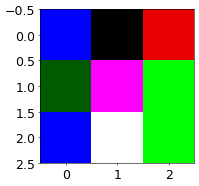

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


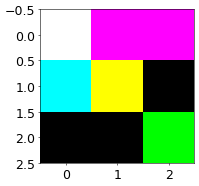

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


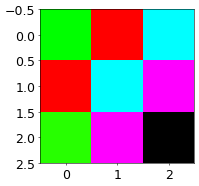

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


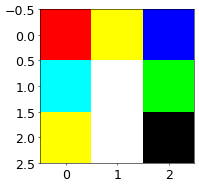

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


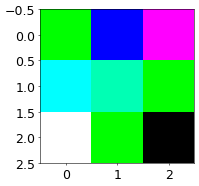

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


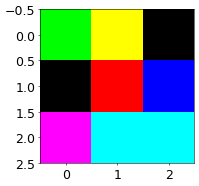

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


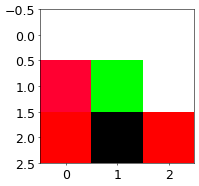

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


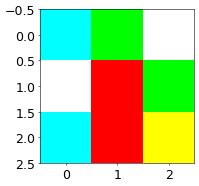

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


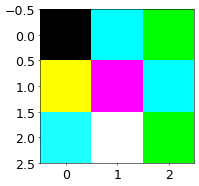

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


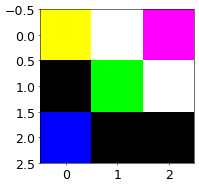

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


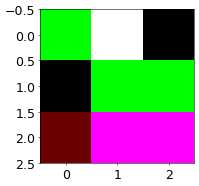

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


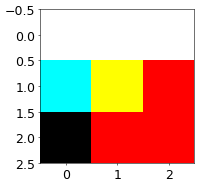

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


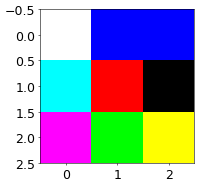

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


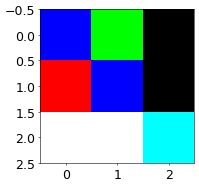

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


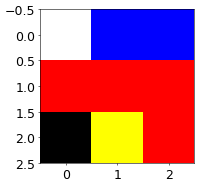

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


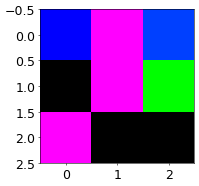

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


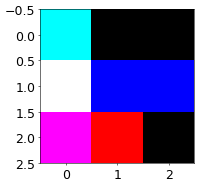

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


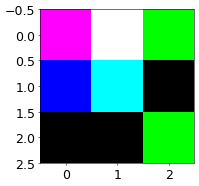

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


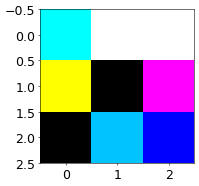

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


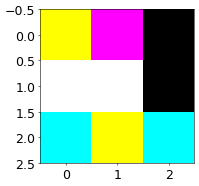

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


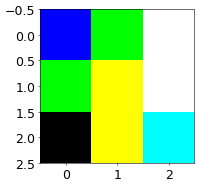

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


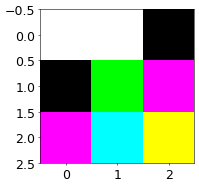

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


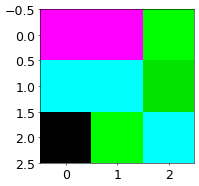

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


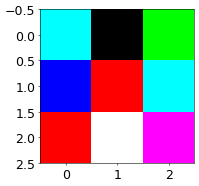

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


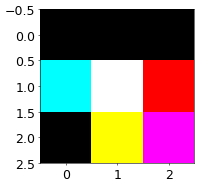

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


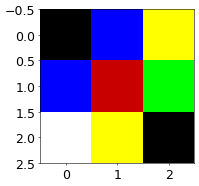

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


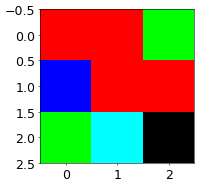

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


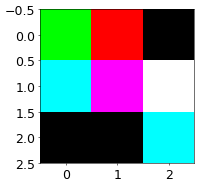

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


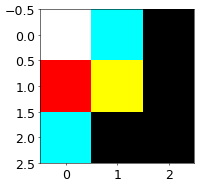

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


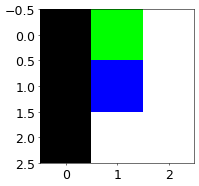

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


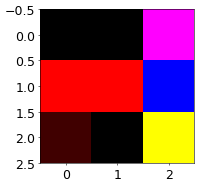

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


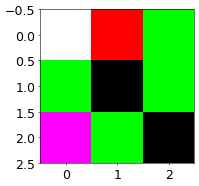

In [65]:
cw1 = np.array(model.layers[1].get_weights())
for i in range(32):
    plt.imshow(cw1[0][:,:,:,i]*255)
    plt.show()

In [101]:
class Tile:   
    x = 0
    y = 0
    width = 0
    height = 0
    imagex = 0
    imagey = 0
    roi = 0

    def __init__(self,x, y, overlap, width, height, imagex, imagey):
        self.x = x
        self.y = y
        self.width = width
        self.height = height
#         self.imagex = x * (width - overlap)
#         self.imagey = y * (height - overlap)
        self.imagex = imagex
        self.imagey = imagey

    def populate(self,master):
        y = self.imagey
        x = self.imagex
        height = self.height
        width = self.width
        #print(y,x)
        self.roi = master[y:y+height, x:x+width]
        if (self.roi.shape[1] < width):
            #print("error", self.roi.shape, x)
            new_x = x - (width-self.roi.shape[1])
            self.roi = master[y:y+height, new_x:new_x+width]
            self.imagex = new_x


        if (self.roi.shape[0] <height):
            #print("error", self.roi.shape)
            new_y = y - (height-self.roi.shape[0])
            self.roi = master[new_y:new_y+height, x:x+width]
            self.imagey = new_y
        

In [102]:
def tileImage(image,width, height, overlap):
    t_width = width
    t_height = height
    overlap = overlap

    # get dimensions of image
    dimensions = image.shape
 
    # height, width, number of channels in image
    height = image.shape[0]
    width = image.shape[1]
    channels = image.shape[2]

    tilesInX = math.ceil(width / (t_width - overlap))
    tilesInY = math.ceil(height / (t_height - overlap))
    
    tiles = []

    
    for y in range(tilesInY):
        row = []
        for x in range(tilesInX):
            tempx =  x * (t_width - overlap)
            tempy = y * (t_height - overlap)
            
            if(y == tilesInY - 1):
                tempy = height - t_height
                
            if(x == tilesInX-1):
                tempx = width - t_width

                

            
            tile = Tile(x,y,overlap,t_width,t_height, tempx, tempy)
            tile.populate(image)
            row.append(tile)
        tiles.append(row)
        
    return tiles
        

In [124]:
def modelInspect(img, model):
    tiles = tileImage(img,64,64,20)
    imarray = []

    for row in tiles:
        for tile in row:
                # convert cv2 to tensor flow
            start = time.perf_counter()
            tileIm = tile.roi
            tileImRGB = cv2.cvtColor(tileIm, cv2.COLOR_BGR2RGB)

            imarray.append(tileImRGB)
 
    arg = tf.convert_to_tensor(imarray, dtype=tf.float32)
    predictions = model.predict(arg)
    indices = np.where(predictions < 0.5)
    #print(indices[0])
    if len(indices[0]) >= 1:
        return 0
    return 1
            
        
def modelInspectStrict(img, model):
    tiles = tileImage(img,64,64,20)
    imarray = []

    for row in tiles:
        for tile in row:
                # convert cv2 to tensor flow
            start = time.perf_counter()
            tileIm = tile.roi
            tileImRGB = cv2.cvtColor(tileIm, cv2.COLOR_BGR2RGB)

            imarray.append(tileImRGB)
 
    arg = tf.convert_to_tensor(imarray, dtype=tf.float32)
    predictions = model.predict(arg)
    indices = np.where(predictions < 0.05)
    #print(indices[0])
    if len(indices[0]) >= 1:
        return 0
    return 1

# No Aug Inspect On Master Images From Person Tester

In [125]:
model = keras.models.load_model("inspection_model")


In [126]:
import os
import math

defectPath = "./personTester/images/defects/"
normalPath = "./personTester/images/normal/"

defectNames = os.listdir(defectPath)
normalNames = os.listdir(normalPath)
print((len(defectNames)))
print((len(normalNames)))

targets = []
predictions = []

for name in defectNames:
    targets.append(0)
    img = cv2.imread(defectPath+name)
#     plt.imshow(img)
#     plt.show()
    exitCode = modelInspect(img, model)
    predictions.append(exitCode)
        
for name in normalNames:
    targets.append(1)
    img = cv2.imread(normalPath+name)
#     plt.imshow(img)
#     plt.show()
    exitCode = modelInspect(img, model)
    predictions.append(exitCode)

8
8


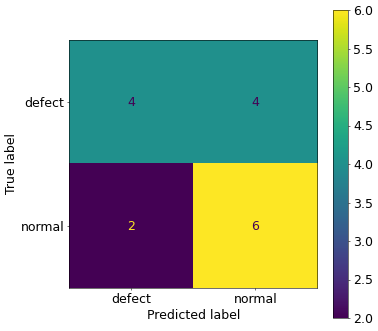

In [127]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

f,ax = plt.subplots(1,1,figsize=(8,8))
plt.rcParams['font.size'] = 18
disp = ConfusionMatrixDisplay.from_predictions(targets,predictions, display_labels=['defect','normal'], ax = ax)
plt.show()

# No Aug Inspect On All Master Images 

In [128]:
import os

defectPath = "./CroppedDefects/"
normalPath = "./NODefect_images_cropped/"

defectNames = os.listdir(defectPath)
normalNames = os.listdir(normalPath)
print((len(defectNames)))
print((len(normalNames)))

targets = []
predictions = []

for name in defectNames:
    targets.append(0)
    img = cv2.imread(defectPath+name)
#     plt.imshow(img)
#     plt.show()
    exitCode = modelInspect(img, model)
    predictions.append(exitCode)
        
for name in normalNames:
    targets.append(1)
    img = cv2.imread(normalPath+name)
#     plt.imshow(img)
#     plt.show()
    exitCode = modelInspect(img, model)
    predictions.append(exitCode)

105
141


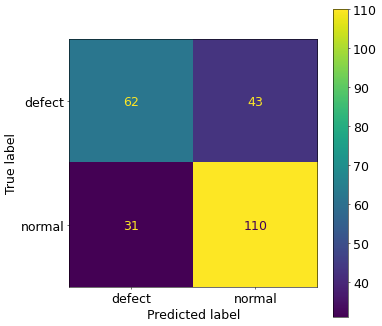

In [129]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

f,ax = plt.subplots(1,1,figsize=(8,8))
plt.rcParams['font.size'] = 18
disp = ConfusionMatrixDisplay.from_predictions(targets,predictions, display_labels=['defect','normal'], ax = ax)
plt.show()

# Aug Inspect On Master Images From Person Tester

8
8


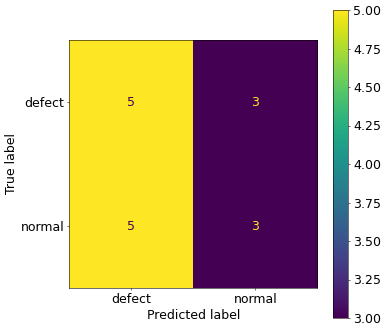

In [130]:
model = keras.models.load_model("inspection_model_aug")

import os
import math

defectPath = "./personTester/images/defects/"
normalPath = "./personTester/images/normal/"

defectNames = os.listdir(defectPath)
normalNames = os.listdir(normalPath)
print((len(defectNames)))
print((len(normalNames)))

targets = []
predictions = []

for name in defectNames:
    targets.append(0)
    img = cv2.imread(defectPath+name)
#     plt.imshow(img)
#     plt.show()
    exitCode = modelInspect(img, model)
    predictions.append(exitCode)
        
for name in normalNames:
    targets.append(1)
    img = cv2.imread(normalPath+name)
#     plt.imshow(img)
#     plt.show()
    exitCode = modelInspect(img, model)
    predictions.append(exitCode)
    
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

f,ax = plt.subplots(1,1,figsize=(8,8))
plt.rcParams['font.size'] = 18
disp = ConfusionMatrixDisplay.from_predictions(targets,predictions, display_labels=['defect','normal'], ax = ax)
plt.show()
    

105
141


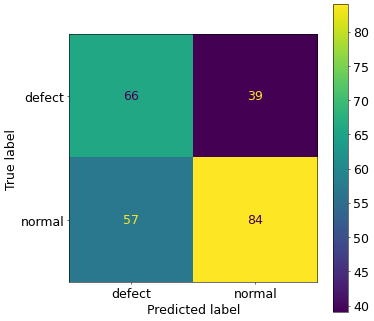

In [131]:
import os

defectPath = "./CroppedDefects/"
normalPath = "./NODefect_images_cropped/"

defectNames = os.listdir(defectPath)
normalNames = os.listdir(normalPath)
print((len(defectNames)))
print((len(normalNames)))

targets = []
predictions = []

for name in defectNames:
    targets.append(0)
    img = cv2.imread(defectPath+name)
#     plt.imshow(img)
#     plt.show()
    exitCode = modelInspect(img, model)
    predictions.append(exitCode)
        
for name in normalNames:
    targets.append(1)
    img = cv2.imread(normalPath+name)
#     plt.imshow(img)
#     plt.show()
    exitCode = modelInspect(img, model)
    predictions.append(exitCode)
    
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

f,ax = plt.subplots(1,1,figsize=(8,8))
plt.rcParams['font.size'] = 18
disp = ConfusionMatrixDisplay.from_predictions(targets,predictions, display_labels=['defect','normal'], ax = ax)
plt.show()

# No Aug Inspect Higher Confidence

8
8


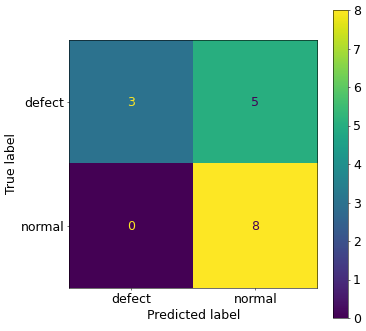

In [132]:
model = keras.models.load_model("inspection_model")

import os
import math

defectPath = "./personTester/images/defects/"
normalPath = "./personTester/images/normal/"

defectNames = os.listdir(defectPath)
normalNames = os.listdir(normalPath)
print((len(defectNames)))
print((len(normalNames)))

targets = []
predictions = []

for name in defectNames:
    targets.append(0)
    img = cv2.imread(defectPath+name)
#     plt.imshow(img)
#     plt.show()
    exitCode = modelInspectStrict(img, model)
    predictions.append(exitCode)
        
for name in normalNames:
    targets.append(1)
    img = cv2.imread(normalPath+name)
#     plt.imshow(img)
#     plt.show()
    exitCode = modelInspectStrict(img, model)
    predictions.append(exitCode)
    
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

f,ax = plt.subplots(1,1,figsize=(8,8))
plt.rcParams['font.size'] = 18
disp = ConfusionMatrixDisplay.from_predictions(targets,predictions, display_labels=['defect','normal'], ax = ax)
plt.show()

105
141


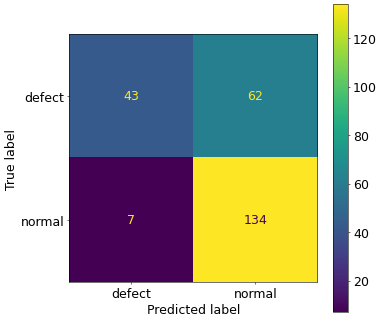

In [136]:
import os

defectPath = "./CroppedDefects/"
normalPath = "./NODefect_images_cropped/"

defectNames = os.listdir(defectPath)
normalNames = os.listdir(normalPath)
print((len(defectNames)))
print((len(normalNames)))

targets = []
predictions = []

for name in defectNames:
    #print('.')
    targets.append(0)
    img = cv2.imread(defectPath+name)
#     plt.imshow(img)
#     plt.show()
    exitCode = modelInspectStrict(img, model)
    predictions.append(exitCode)
        
for name in normalNames:
    targets.append(1)
    img = cv2.imread(normalPath+name)
#     plt.imshow(img)
#     plt.show()
    exitCode = modelInspectStrict(img, model)
    predictions.append(exitCode)
    
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

f,ax = plt.subplots(1,1,figsize=(8,8))
plt.rcParams['font.size'] = 18
disp = ConfusionMatrixDisplay.from_predictions(targets,predictions, display_labels=['defect','normal'], ax = ax)
plt.show()

#  Aug Inspect Higher Confidence

8
8


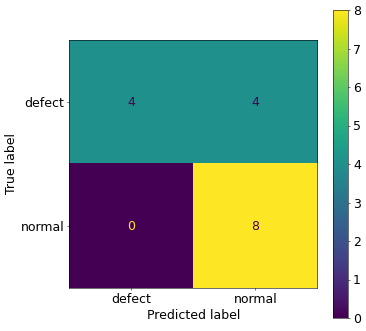

In [137]:
model = keras.models.load_model("inspection_model_aug")

import os
import math

defectPath = "./personTester/images/defects/"
normalPath = "./personTester/images/normal/"

defectNames = os.listdir(defectPath)
normalNames = os.listdir(normalPath)
print((len(defectNames)))
print((len(normalNames)))

targets = []
predictions = []

for name in defectNames:
    targets.append(0)
    img = cv2.imread(defectPath+name)
#     plt.imshow(img)
#     plt.show()
    exitCode = modelInspectStrict(img, model)
    predictions.append(exitCode)
        
for name in normalNames:
    targets.append(1)
    img = cv2.imread(normalPath+name)
#     plt.imshow(img)
#     plt.show()
    exitCode = modelInspectStrict(img, model)
    predictions.append(exitCode)
    
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

f,ax = plt.subplots(1,1,figsize=(8,8))
plt.rcParams['font.size'] = 18
disp = ConfusionMatrixDisplay.from_predictions(targets,predictions, display_labels=['defect','normal'], ax = ax)
plt.show()

105
141


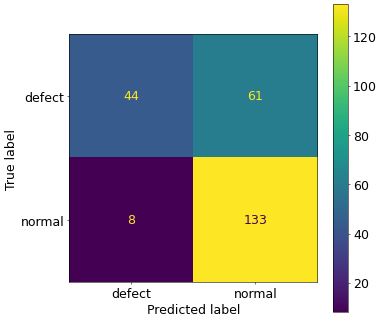

In [138]:
import os

defectPath = "./CroppedDefects/"
normalPath = "./NODefect_images_cropped/"

defectNames = os.listdir(defectPath)
normalNames = os.listdir(normalPath)
print((len(defectNames)))
print((len(normalNames)))

targets = []
predictions = []

for name in defectNames:
    targets.append(0)
    img = cv2.imread(defectPath+name)
#     plt.imshow(img)
#     plt.show()
    exitCode = modelInspectStrict(img, model)
    predictions.append(exitCode)
        
for name in normalNames:
    targets.append(1)
    img = cv2.imread(normalPath+name)
#     plt.imshow(img)
#     plt.show()
    exitCode = modelInspectStrict(img, model)
    predictions.append(exitCode)
    
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

f,ax = plt.subplots(1,1,figsize=(8,8))
plt.rcParams['font.size'] = 18
disp = ConfusionMatrixDisplay.from_predictions(targets,predictions, display_labels=['defect','normal'], ax = ax)
plt.show()